In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [39]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [40]:
df['Дата'] = pd.to_datetime(df['Дата'])
print(df.dtypes)

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [41]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

Вывести несколько первых строк сгруппированных данных

In [42]:
print(grouped_df.head())

        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Нарисуйте график продаж у `grouped_df`

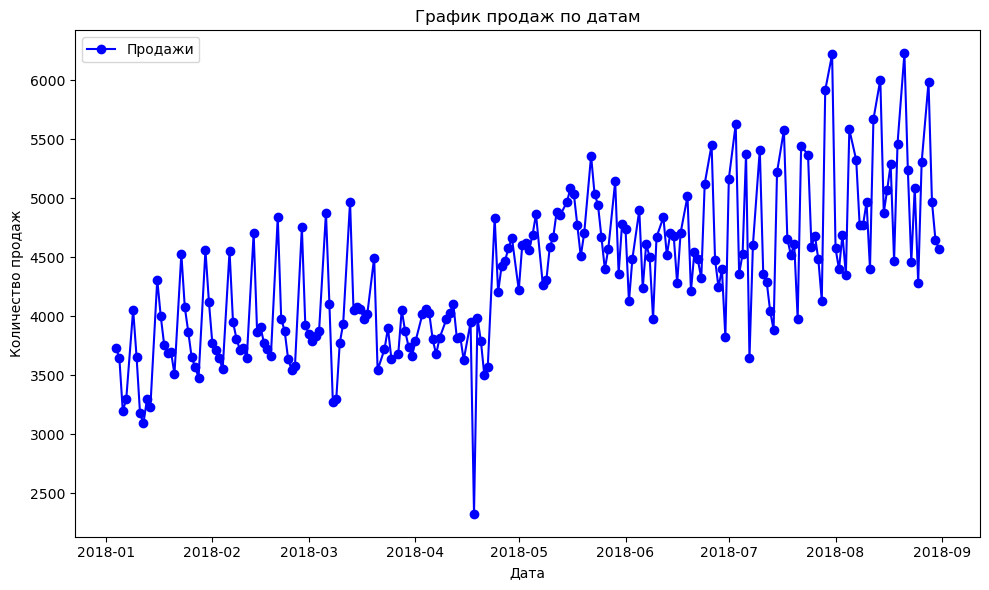

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o', color='b', label='Продажи')

plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.title('График продаж по датам')
plt.legend()

plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

##### На графике видно, что продажи колеблются, но в целом остаются на одном уровне. В начале месяца продажи часто выше, а в конце месяца и в середине недели могут быть ниже.

Есть несколько дней с высокими продажами, например, в конце июня и июля, когда цифры достигают 6000 и более. Иногда продажи сильно падают, как 18 апреля, когда их было всего 2326.

В целом, можно заметить, что продажи немного растут в начале месяца и в выходные, а в середине месяца и по будням могут снижаться. Такие колебания могут зависеть от разных факторов, например, от распродаж или праздников.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [44]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]

max_outlier = outliers.loc[outliers['Количество'].idxmax()]

print(max_outlier)

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [45]:
df['Дата'] = pd.to_datetime(df['Дата'])
filtered_df = df[
    (df['Дата'].dt.month.isin([6, 7, 8])) &
    (df['Дата'].dt.weekday == 2) &
    (df['Склад'] == 3)
]

top_product = (
    filtered_df.groupby('Номенклатура')['Количество']
    .sum()
    .idxmax()
)

print(f"Топовый товар по продажам по средам: {top_product}")

Топовый товар по продажам по средам: product_1


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [46]:
temperature_df = pd.read_csv('weather_data.csv')  # Замените на имя вашего файла

temperature_df['Date'] = pd.to_datetime(temperature_df['Date'])

print(temperature_df.head())

        Date     T
0 2018-08-31   9.9
1 2018-08-31  11.9
2 2018-08-31  19.1
3 2018-08-31  19.7
4 2018-08-31  16.5


In [49]:
grouped_df = grouped_df.rename(columns={'Дата': 'Date'})
temperature_df = temperature_df.rename(columns={'Date': 'Дата'})

grouped_df['Date'] = pd.to_datetime(grouped_df['Date'])
temperature_df['Дата'] = pd.to_datetime(temperature_df['Дата'])

merged_df = pd.merge(grouped_df, temperature_df, left_on='Date', right_on='Дата')

print(merged_df.head())

        Date  Количество       Дата     T
0 2018-01-04        3734 2018-01-04 -23.2
1 2018-01-04        3734 2018-01-04 -24.1
2 2018-01-04        3734 2018-01-04 -23.0
3 2018-01-04        3734 2018-01-04 -21.2
4 2018-01-04        3734 2018-01-04 -24.5


In [50]:
temperature_avg = temperature_df.groupby('Дата')['T'].mean().reset_index()

merged_df = pd.merge(grouped_df, temperature_avg, left_on='Date', right_on='Дата')

print(merged_df.head())

        Date  Количество       Дата        T
0 2018-01-04        3734 2018-01-04 -25.0250
1 2018-01-05        3643 2018-01-05 -16.7375
2 2018-01-06        3193 2018-01-06 -19.5750
3 2018-01-07        3298 2018-01-07 -12.3000
4 2018-01-09        4055 2018-01-09  -5.6250


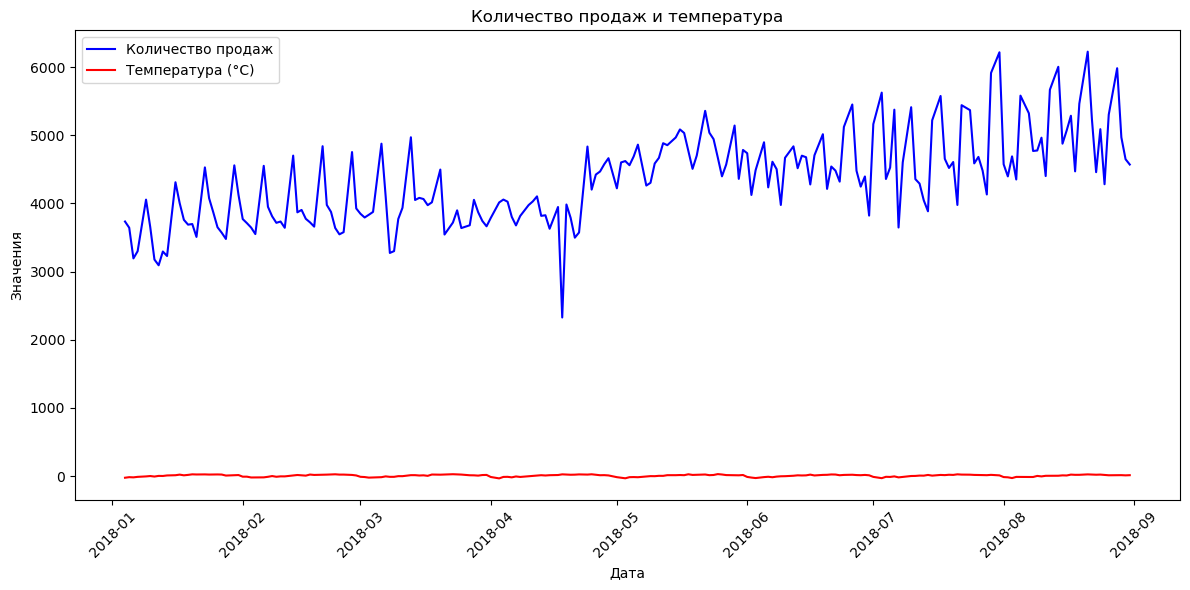

In [51]:
plt.figure(figsize=(12, 6))

plt.plot(merged_df['Date'], merged_df['Количество'], label='Количество продаж', color='blue')

plt.plot(merged_df['Date'], merged_df['T'], label='Температура (°C)', color='red')

plt.xlabel('Дата')
plt.ylabel('Значения')
plt.title('Количество продаж и температура')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()